In [1]:
import numpy as np
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm 
import maya
import math
import cv2

# Where to save the figures
# PROJECT_ROOT_DIR = "."
# PROJECT_SAVE_DIR = "Figure_PDFs"

import os
# if not (os.path.isdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)):
#     print('Figure directory didn''t exist, creating now.')
#     os.mkdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)
# else:
#     print('Figure directory exists.') 
# def savepdf(fig,name):
#     fig.savefig(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR+'/'+name+'.png')
   

In [6]:
import rasterio
from rasterio.windows import Window
from pyproj import Transformer
import numpy as np
import os
from os import listdir
from os.path import isfile, join
np.random.seed(42)

import copy
import matplotlib
import matplotlib.pyplot as plt


import pyproj
import pickle as pkl
import geojson
import cv2
from PIL import Image, ImageEnhance
os.getcwd()

'/Users/sarah/Satellite_Image_Processing'

In [23]:
folder_dir = '../Desktop/Vanuto_crops'

In [32]:
for f in sorted(listdir(folder_dir))[38:43]:
    
    im = np.moveaxis(rasterio.open(os.path.join(folder_dir, f)).read(), 0, 2)
    img_arr = np.array(im)
    fig = plt.figure(figsize=(12,10))
    for j in range(5):
        plt.subplot(2,3,j)
        plt.imshow(img_arr[j] ) 
    plt.imshow(img_arr)
    plt.axis('off')
    plt.show()

ValueError: num must be 1 <= num <= 6, not 0

<Figure size 864x720 with 0 Axes>

The below code must be handled carefully, as it deletes images that do not fit the size (479,478). First, i print out the size of all the images to see what the most common size is, and then I delete the ones that do not fit and are too long or too big or too small. I'm not too sure why this occurs, since in previous scripts we have specified the images to be 1km by 1km. There are only a handful of images that break these boundaries. So handle this block with caution.

Code not really necessary.

In [10]:
# import os

# directory = 'Desktop/present/usembassy'

# for filename in os.listdir(directory):
#     if filename.endswith(".tif"): 
#         img = cv2.imread(os.path.join(directory, filename))
# #         plt.imshow(img)
# #         plt.show()
#         h,w,_ = img.shape
# #         print(h,w)
# #         print(os.listdir(directory))
#         if (not (h ==479 and w == 478)):

#             print(os.path.join(directory, filename))
#             print(h,w)
#             os.remove(os.path.join(directory,filename))
# # #         print(h,w)
# #         continue
# #     else:
# #         continue

Desktop/present/usembassy/20201227_041639_08_2251_3B_Visual_clip.tif
298 476
Desktop/present/usembassy/20191013_032916_020_3B_Visual_clip.tif
477 318
Desktop/present/usembassy/20180504_044731_104b_3B_Visual_clip.tif
476 288
Desktop/present/usembassy/20190520_034929_0f2d_3B_Visual_clip.tif
476 285
Desktop/present/usembassy/20180816_042708_1024_3B_Visual_clip.tif
476 264
Desktop/present/usembassy/20190315_040129_0f1a_3B_Visual_clip.tif
466 478
Desktop/present/usembassy/20191107_043751_101b_3B_Visual_clip.tif
477 301
Desktop/present/usembassy/20191120_032338_0f3c_3B_Visual_clip.tif
478 384
Desktop/present/usembassy/20180816_042707_1024_3B_Visual_clip.tif
442 478
Desktop/present/usembassy/20200829_043949_1001_3B_Visual_clip.tif
229 475
Desktop/present/usembassy/20180404_042328_0f12_3B_Visual_clip.tif
104 473
Desktop/present/usembassy/20180115_050412_0f2a_3B_Visual_clip.tif
468 478
Desktop/present/usembassy/20200403_030036_0f36_3B_Visual_clip.tif
391 477
Desktop/present/usembassy/20200201_0

In [50]:
data = []
time = []
aod = []
with open('Desktop/K_224_met_aod_10am_only.pkl', 'rb') as fp:
    for station in tqdm(pkl.load(fp), position=0, leave=True):
        for data_point in station:
            data.append(data_point)
#             print(data_point)
            time.append(data_point['Time_stamp'])
            aod.append(round(data_point['Meteo']['AOD'],2))
#             images.append(data_point['Image'])
#             pm.append(data_point['PM'])
#             date.append(data_point['Date'])
#             satid.append(data_point['Sat_ID'])

100%|██████████| 7/7 [00:00<00:00, 51.61it/s]


In [51]:
aod

[0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.04,
 0.03,
 0.03,
 0.04,
 0.02,
 0.02,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.04,
 0.04,
 0.03,
 0.03,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.03,
 0.03,
 0.03,
 0.02,
 0.02,
 0.02,
 0.03,
 0.03,
 0.03,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.03,
 0.03,
 0.03,
 0.02,
 0.02,
 0.01,
 0.03,
 0.03,
 0.02,
 0.02,
 0.02,
 0.01,
 0.01,
 0.01,
 0.0,
 0.03,
 0.03,
 0.03,
 0.03,
 0.04,
 0.02,
 0.02,
 0.02,
 0.03,
 0.02,
 0.02,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.04,
 0.04,
 0.02,
 0.01,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.02,
 0.02,
 0.03,
 0.03,
 0.03,
 0.03,
 0.02,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.02,
 0.01,
 0.01,
 0.01,
 0.03,
 0.03,
 0.03,
 0.03,
 0.02,
 0.02,
 0.03,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.03,
 0.03,
 0.03,
 0.02,
 0.03,
 0.03,
 0.03,
 0.02,
 0.02,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,


In [19]:
kathtimes = []
for n in range(len(time)):
    timestring = str(time[n])
    timeobj = datetime.datetime.strptime(timestring, '%H:%M:%S')
    dt = maya.parse(timeobj).datetime(to_timezone='Asia/Kathmandu', naive=False)
    times = dt.strftime('%H:%M:%S')
    kathtimes.append(times)

In [43]:
data[0]['Meteo']['AOD']

0.0201

Below plots 3 by 3 grids of images, read in from a pickle file created pairing the images with their PM and Aeorosol Optical Depth. 

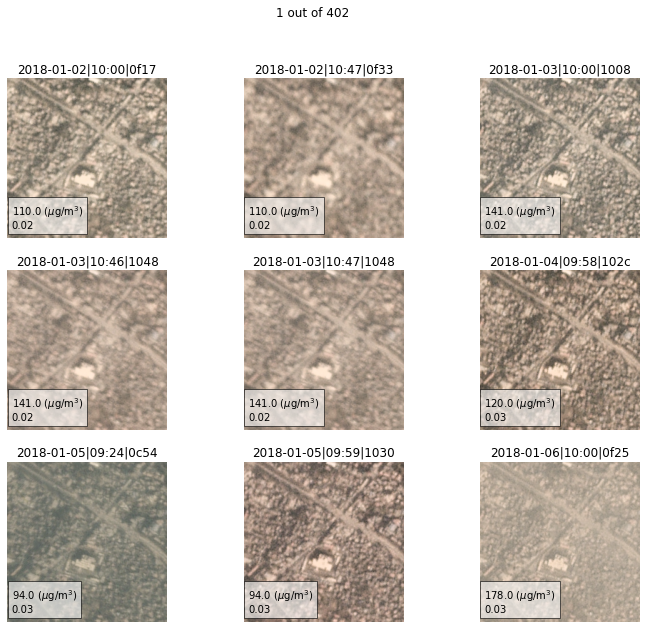

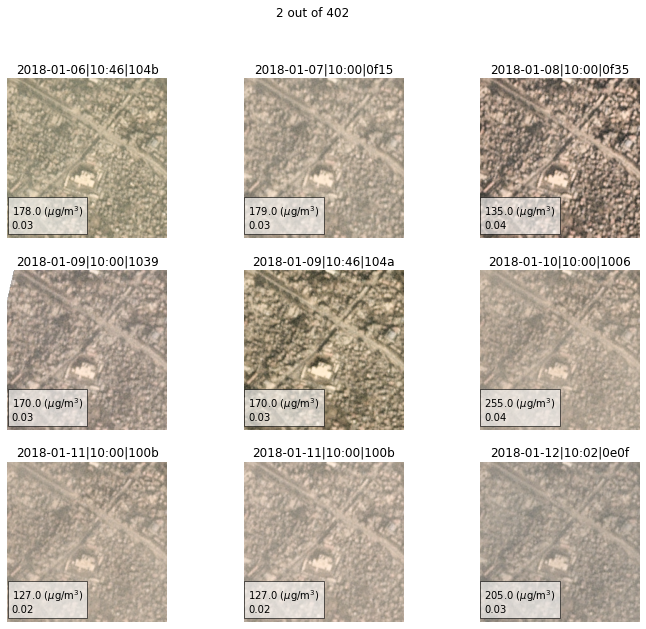

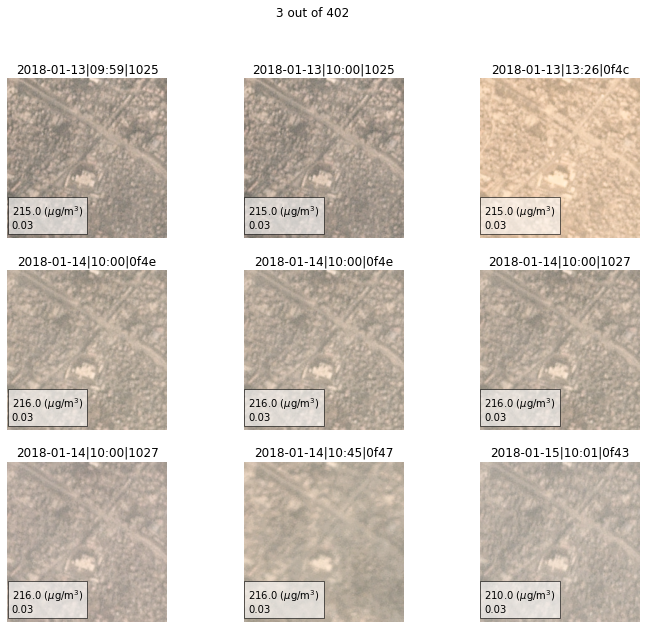

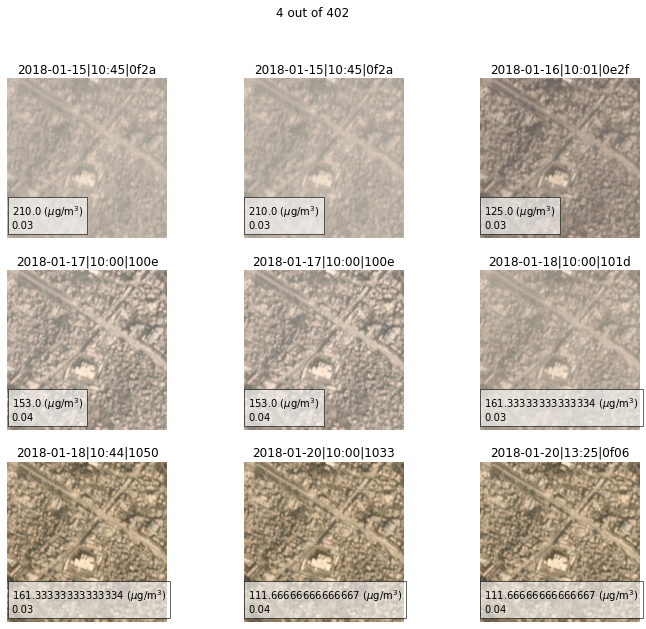

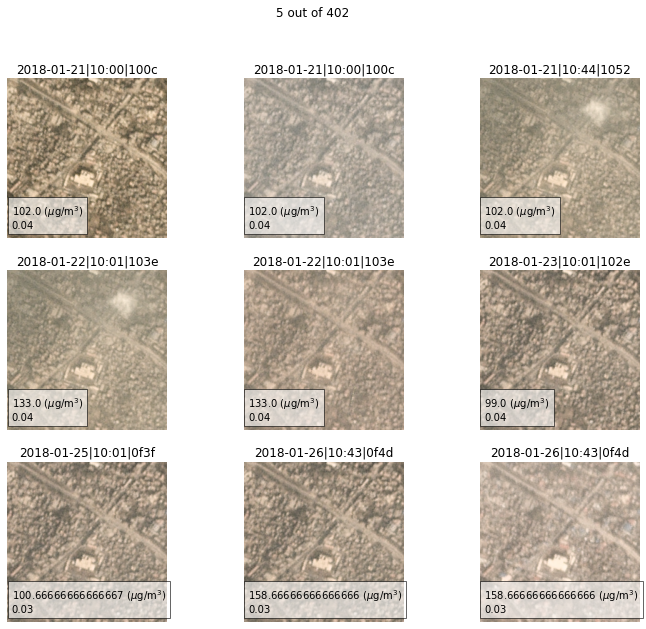

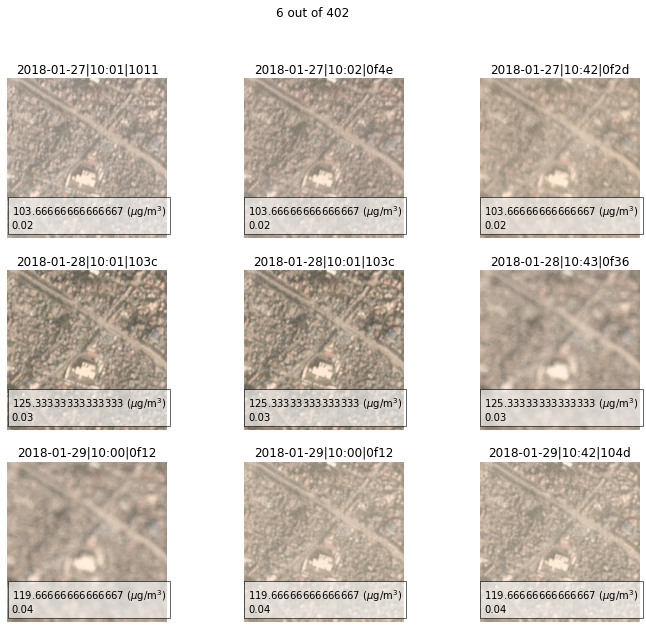

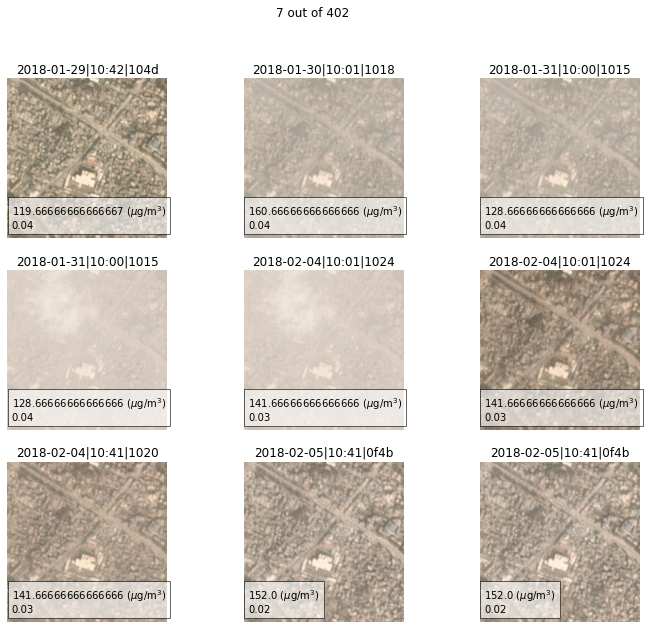

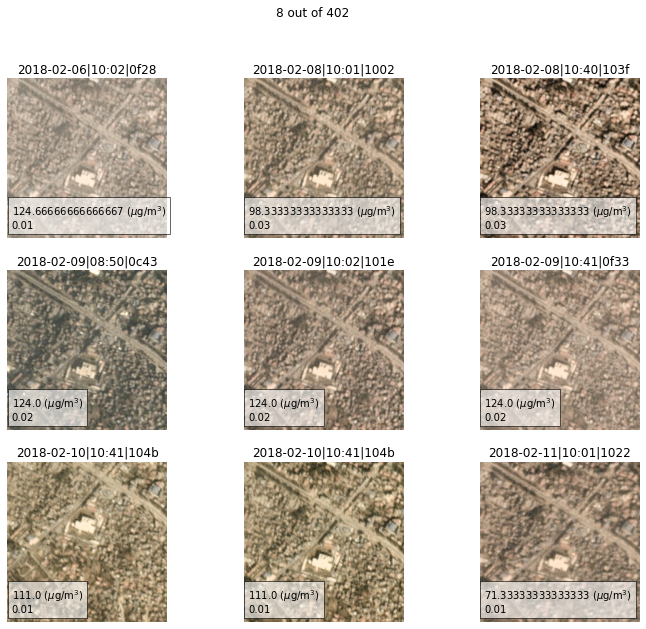

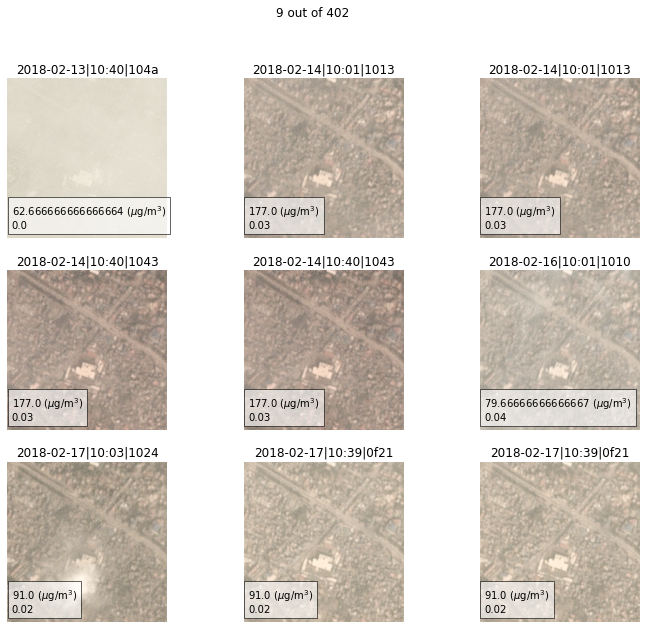

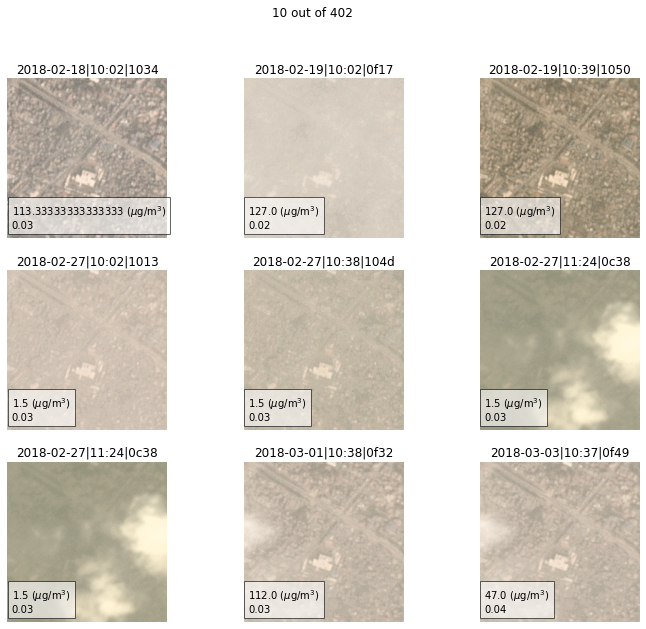

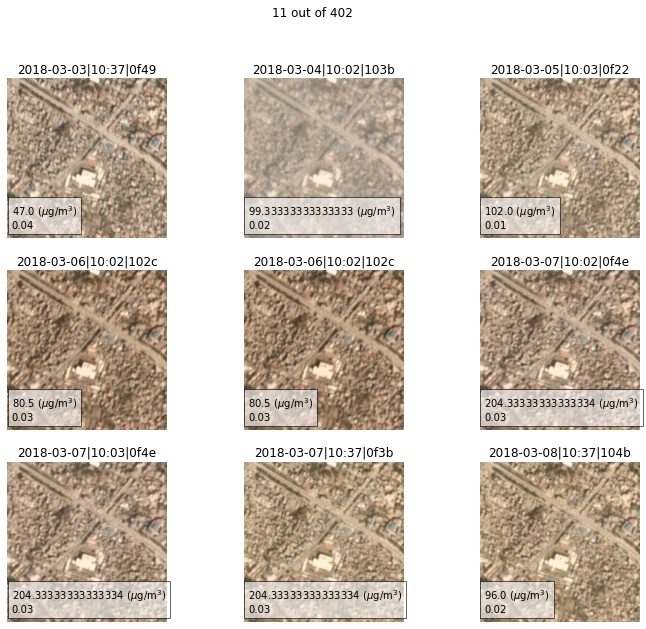

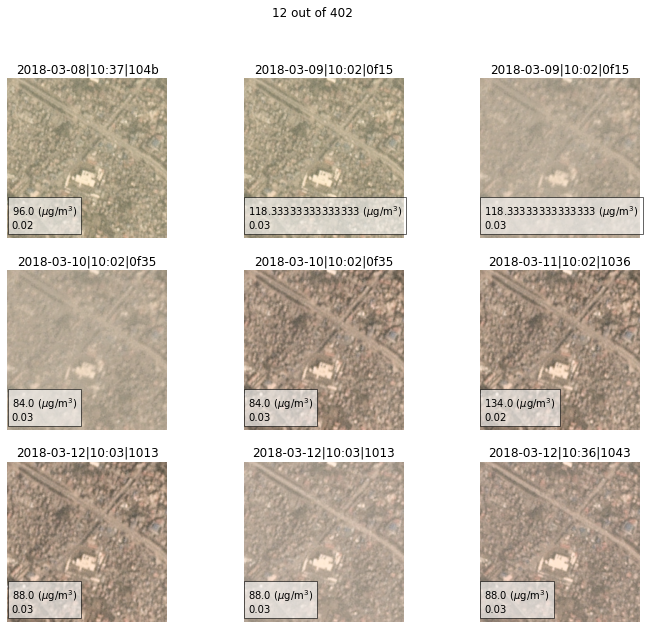

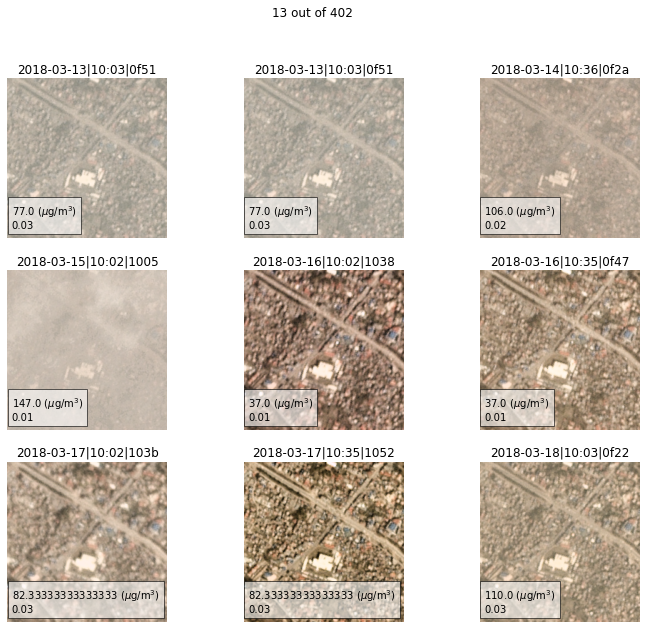

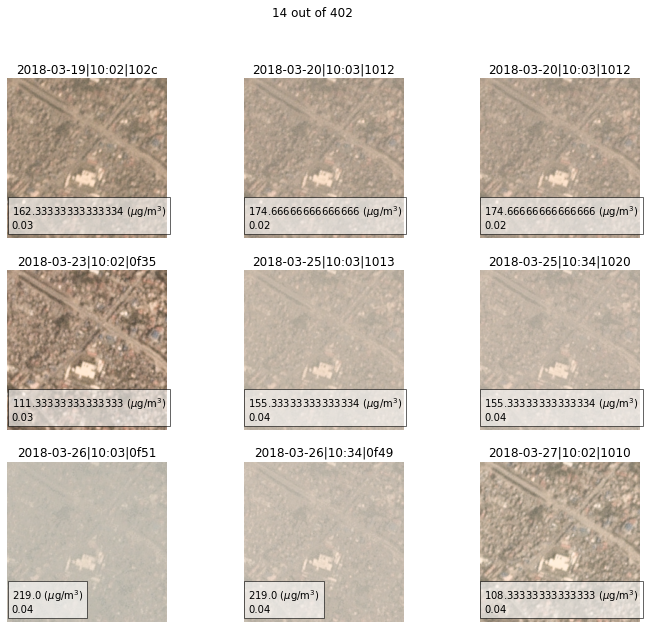

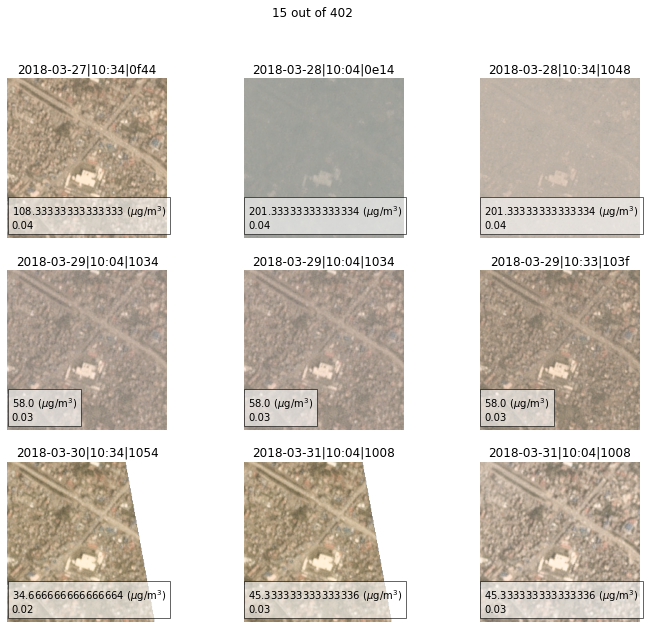

KeyboardInterrupt: 

In [53]:

for i in range(0,(round(len(data)/9)+1)):
    k=0
    fig = plt.figure(figsize=(12,10))
    for j in range(i*9,(i+1)*9):
        k+=1
        plt.subplot(3,3,k)
        plt.imshow(data[j]['Image'], vmin=0, vmax=60)
# #         plt.imshow(data[j]['Image'][:,:,:])
        plt.title(data[j]['Date'] +'|'+ kathtimes[j][0:5] + '|'+ data[j]['Sat_ID'])
        plt.axis('off')
        plt.suptitle('{} out of {}'.format(i+1,round(len(data)/9 )))
# #         plt.suptitle('Kathmandu Greenband Analytic')
        plt.text(6,210, str(data[j]['PM']) +r' ($\mu$g/m$^3$)'+ '\n' + str(aod[j]), 
        bbox=dict(facecolor='white', alpha = 0.6),color='black', weight='roman', fontsize=10)
#         plt.subplots_adjust(wspace=0.02, hspace=0.2)

# #         fig.savefig('./Figure_PDFs/AC/analytic_greenband_imgs/{}.png'.format(i+1), dpi=150, bbox_inches='tight')
#         fig.patch.set_facecolor('white')
    
    plt.show()
